# 线性

这里先来简单讨论一下，什么是线性。

线性在数学中的表示，就是要满足两个性质：
 - 1.齐次性，即有函数$f(x)$为线性函数，则有$af(x) = f(ax)$
 - 2.可加性，即有线性函数$f(x)$，则有$f(a+b) = f(a) + f(b)$
 
综合起来就是:

### $$f(ax+by) = af(x) + bf(y)$$

我们于上一节提到了全连接层的传播公式：

### $$y = Wx + b$$
若把公式看成$y$关于$x$的函数，则这个函数就是一个线性函数，检验的话可以使用上面的两个性质。当然，矩阵乘法和向量加法本就是线性运算。

**只包含线性运算的模型称为线性模型**

线性函数在图像上的表示，一般为直线或平面，这样的话，线性的神经网络可以解决的问题，当然也应该是线性的，比如：

1.线性分类：
![](pic\1.png)
线性分类的特征是，可以找到空间的一个超平面，这个超平面可以将不同类的样本分隔在两个不同的半空间内(如上图)。

2.线性回归
![](pic\3.jpg)
因变量和自变量之间的关系是趋近于线性的，此时我们就可以寻找一个平面去拟合这些数据(换句话说就是让数据对应的点离平面的距离之和尽量小)

**注：超平面和半空间和**：超平面是一个点集，设空间的远点为O，从空间中先选取一个向量，则垂直于这个向量的所有向量的终点构成的点集，再加上一个用于平移的值，就算是这个空间的超平面，定义为$\{x|Wx = b\}$，W，x都是向量，b是一个标量。1维空间的超平面是1个点，二维空间的超平面是一条直线，三维空间是一个平面；**半空间**则是由于超平面可以将原空间分为两个相同的子空间，这样的子空间就称为半空间。

![](pic\2.png)

### 我们可以在tensorflow的playground看一看线性全连接层对先线性任务的表现。

网址：playground.tensorflow.org

# 非线性

线性介绍过了，那么不满足线性性质的就可以称为非线性。

非线性也对应着两类任务。

1.分类
我们不能在数据空间中找到一个超平面，能较好的将不同类别的数据划分成两半，最著名的问题就是异或问题：
![](pic\4.png)

异或问题可以总结为：$xy>=0$的类，属于蓝色类，$xy<0$的类，属于橘黄色类，可以看到，没法找到一条直线，将这两类数据分成两半。

2.回归
非线性回归，有因变量和自变量之间的关系并非线性，比如二次回归，他们之间的关系是二次的关系：
![](pic\5.png)
这样的回归问题自然不能使用线性模型完成。

我们也可以在tensorflow的playground中看一看非线性网络的表现。

线性模型虽然简单，但是在自然界中，更常见的是非线性。比如物种的繁殖曲线，一天之中气温的变化，等等。也有科学研究表明，生物神经元中输入和输出的关系并非线性。（从神经科学上来看，中央区酷似神经元的兴奋态，两侧区酷似神经元的抑制态，因而在神经网络学习方面，可以将重点特征推向中央区，将非重点特征推向两侧区。无论是哪种解释，看起来都比早期的线性激活函数高明很多，来源：https://www.cnblogs.com/neopenx/p/4453161.html）

那么我们上一节提到的人工神经元，也应该改一改：

![](pic\6.jpg)

我们在神经元的输出部位添加了一个激活函数(当然激活函数一般时非线性的)，因为线性运算+非线性运算=非线性，这样就成功的在人工神经元中引入了非线性。

接下来再来看一看全连接神经网络的变化：全连接层的输出是由很多人工神经元输出组成的向量，相比于没有加入非线性的全连接层，加入非线性的全连接层就相当于把输出向量中的每一个分量都用激活函数激活了一遍。

不知道大家还记不记得第二节末尾提到的问题：增加网络的层数，可以使模型表现的更好，这个问题其实只针对于加入的层是非线性的，为什么呢？

我们来看一看线性的层的堆叠：假设3层线性的全连接层叠在一起

### $$y = W_3(W_2(W_1x+b_1)+b_2)+b_3$$
### $$y = W_3(W_2W_1x + W_2b_1 + b_2)+b_3$$
### $$y = W_3W_2W_1x + W_3W_2b_1 + W_3b_2 + b_3$$
### $$若令W = W_3W_2W_1,b = W_3W_2b_1 + W_3b_2 + b_3$$
### $$则原式为：y=Wx+b$$

也就是说，多层的线性全连接层其实效果是和1层全连接层差不多的。

而对于非线性层的堆叠，则不会出现这样的情况，因为非线性函数不遵循齐次性，我们没法合并变量。

而且非线性层为模型提供了强大的拟合能力，多层堆叠起来，网络的表达能力将会十分惊人：

![](pic\7.png)
![](pic\8.png)

MNIST数据集，若以预测概率分布，模型结构为2层全连接为准，使用线性模型的准确性一般在$89\%~92\%$左右，而使用非线性模型准确率一般在$96\%~98\%$左右。

这里引出一个问题，为什么MNIST用线性模型分类的结果好像还不错？大家可以留在有空的时候思考一下。

# 常见的激活函数

我们提到了在人工神经元中引入非线性的方法，就是在输出位置添加一个函数，这个函数称为激活函数，那么，在深度学习中，都有哪些常用的激活函数呢？

### 第1类
第一类激活函数主要是sigmoid激活函数，tanh激活函数，softmax激活函数。

sigmoid激活函数的公式为：
#### $$S(x) = \frac{1}{1+e^{-x}}$$

它可以将输入由$(+\infty, -\infty)映射到(-1, 1)$，图像为：
![](pic\8.jpg)

(题外话，不知道大家注意到没有，高中生物学的S型增长曲线和sigmoid长得很像，其实如果将sigmoid进行一下线性变换就可以得到S型增长曲线)

正因为这样的性质，sigmoid多用于二分类。

tanh是我们之前一直使用的激活函数，它其实和sigmoid互相转换：

#### $$tanh = sigmoid * 2 - 1$$

图像为：
![](pic\9.jpg)

有对应于二分类的sigmoid激活函数，自然也有对应多分类的softmax函数。

多分类问题相比于二分类问题，样本的种类不限于2种，但是问题的本质也是每个样本只可能属于一个种类。

因为MNIST问题是多分类问题，因此我们之前最后一层网络的激活函数都使用的是softmax激活函数。不知道大家还记不记得softmax激活函数的作用。

softmax函数接受一个非概率分布(以向量的形式表现)，输出一个概率分布，其中，输入中越大的分量在输出中相应就越大。并且Softmax会拉大大的数值和小的数值对应的概率值的差距。

softmax的表达式为：

### $$S_i = \frac{e^{x_i}}{\sum_je^{x_j}}$$

$S_i$表示输出的第i个分量，$x_j$表示输入的第j个分量，与sigmoid对比可以得知，sigmoid输出的某个分量的值只和输入中对应的分量有关，而softmax输出的某个分量和整个输入都相关。

由于Softmax输入接受一个向量，不太好可视化，因此就没图放了。

**注**：sigmoid和softmax两个函数都是由广义线性模型和指数族分布推导而来的，为了避免系列过于硬核，这里就不放了，如果大家对原理有兴趣，可以看一看这两个东西。

### 第二类
第二类激活函数主以ReLu激活函数和他的变种为主。

sigmoid是早期神经网络中常常使用的激活函数，但该函数也有一些缺陷，这个等到之后讲神经网络是怎么训练的时候会提到。因此就有了更优秀的激活函数ReLu。

先说一下Relu激活函数也叫**线性整流函数**，这个函数很简单，即

### $$f(x) = max(0, x)$$

图像为：

![](pic\10.png)

可以看到，相对于sigmoid的平滑，relu是带点棱角的，它的右半部分是一条过原点，斜率为1的直线，左半部分是与x轴重合的直线。这样的特性会在回归或分类的时候带来一些有趣的效果，这个会在下面的演示中看到。

更多关于ReLu激活函数的信息：https://www.cnblogs.com/neopenx/p/4453161.html ，其中会涉及到一些之前没有讲到但之后会讲的东西。

由ReLu演变出来的函数由Leaky ReLu，这个函数其实就是把Relu左边的直线加上了一个很小的斜率。

### 当然激活函数很多，激活函数的研究和提出也是一个神经网络中很重要的部分，比如最新的激活函数ELU，GELU等等。但本期我们只是简单说一下常用的激活函数。因此就先提到这些。

接下来我们来做一个二次回归任务，并使用不同的网络层数和不同的激活函数查看不同的效果。

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

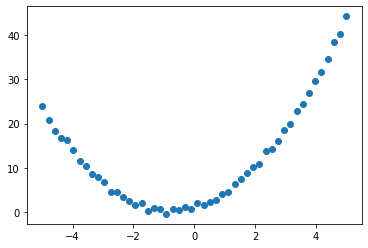

In [2]:
data_size = 50

x = np.linspace(-5, +5, data_size, dtype=np.float32) # tensorflow2 默认接受float32数据
noise = np.random.normal(scale=0.5, size=data_size)

a = 1.3
b = 2
c = 1

y = a * (x ** 2) + b * x + c + noise

plt.scatter(x, y)

下面我们来看看层数稍浅，不同激活函数的表现

Train on 50 samples
Epoch 1/1000
50/50 [==============================] - 1s 14ms/sample - loss: 320.0466
Epoch 2/1000
50/50 [==============================] - 0s 159us/sample - loss: 317.3075
Epoch 3/1000
50/50 [==============================] - 0s 120us/sample - loss: 315.4608
Epoch 4/1000
50/50 [==============================] - 0s 140us/sample - loss: 313.9846
Epoch 5/1000
50/50 [==============================] - 0s 139us/sample - loss: 312.7145
Epoch 6/1000
50/50 [==============================] - 0s 140us/sample - loss: 311.3709
Epoch 7/1000
50/50 [==============================] - 0s 140us/sample - loss: 310.3557
Epoch 8/1000
50/50 [==============================] - 0s 139us/sample - loss: 309.3078
Epoch 9/1000
50/50 [==============================] - 0s 160us/sample - loss: 308.2916
Epoch 10/1000
50/50 [==============================] - 0s 140us/sample - loss: 307.3714
Epoch 11/1000
50/50 [==============================] - 0s 139us/sample - loss: 306.4002
Epoch 12/1000
50/50 [=

Epoch 94/1000
50/50 [==============================] - 0s 160us/sample - loss: 244.2263
Epoch 95/1000
50/50 [==============================] - 0s 180us/sample - loss: 243.5106
Epoch 96/1000
50/50 [==============================] - 0s 180us/sample - loss: 243.0499
Epoch 97/1000
50/50 [==============================] - 0s 180us/sample - loss: 242.7150
Epoch 98/1000
50/50 [==============================] - 0s 179us/sample - loss: 242.0778
Epoch 99/1000
50/50 [==============================] - 0s 219us/sample - loss: 241.3757
Epoch 100/1000
50/50 [==============================] - 0s 179us/sample - loss: 240.8452
Epoch 101/1000
50/50 [==============================] - 0s 160us/sample - loss: 240.3115
Epoch 102/1000
50/50 [==============================] - 0s 219us/sample - loss: 239.7363
Epoch 103/1000
50/50 [==============================] - 0s 160us/sample - loss: 239.1488
Epoch 104/1000
50/50 [==============================] - 0s 160us/sample - loss: 238.4999
Epoch 105/1000
50/50 [=====

50/50 [==============================] - 0s 159us/sample - loss: 198.1221
Epoch 186/1000
50/50 [==============================] - 0s 160us/sample - loss: 197.7553
Epoch 187/1000
50/50 [==============================] - 0s 140us/sample - loss: 197.2638
Epoch 188/1000
50/50 [==============================] - 0s 160us/sample - loss: 196.7883
Epoch 189/1000
50/50 [==============================] - 0s 140us/sample - loss: 196.3809
Epoch 190/1000
50/50 [==============================] - 0s 160us/sample - loss: 195.8871
Epoch 191/1000
50/50 [==============================] - 0s 119us/sample - loss: 195.4052
Epoch 192/1000
50/50 [==============================] - 0s 140us/sample - loss: 194.9098
Epoch 193/1000
50/50 [==============================] - 0s 119us/sample - loss: 194.4587
Epoch 194/1000
50/50 [==============================] - 0s 120us/sample - loss: 193.9968
Epoch 195/1000
50/50 [==============================] - 0s 160us/sample - loss: 193.5987
Epoch 196/1000
50/50 [==============

50/50 [==============================] - 0s 160us/sample - loss: 160.6530
Epoch 278/1000
50/50 [==============================] - 0s 140us/sample - loss: 160.2643
Epoch 279/1000
50/50 [==============================] - 0s 139us/sample - loss: 159.8791
Epoch 280/1000
50/50 [==============================] - 0s 140us/sample - loss: 159.4989
Epoch 281/1000
50/50 [==============================] - 0s 119us/sample - loss: 159.1785
Epoch 282/1000
50/50 [==============================] - 0s 139us/sample - loss: 158.7639
Epoch 283/1000
50/50 [==============================] - 0s 100us/sample - loss: 158.5925
Epoch 284/1000
50/50 [==============================] - 0s 160us/sample - loss: 158.2381
Epoch 285/1000
50/50 [==============================] - 0s 120us/sample - loss: 157.7817
Epoch 286/1000
50/50 [==============================] - 0s 160us/sample - loss: 157.3265
Epoch 287/1000
50/50 [==============================] - 0s 120us/sample - loss: 156.9723
Epoch 288/1000
50/50 [==============

50/50 [==============================] - 0s 180us/sample - loss: 129.2883
Epoch 370/1000
50/50 [==============================] - 0s 140us/sample - loss: 128.9763
Epoch 371/1000
50/50 [==============================] - 0s 180us/sample - loss: 128.5455
Epoch 372/1000
50/50 [==============================] - 0s 180us/sample - loss: 128.2917
Epoch 373/1000
50/50 [==============================] - 0s 160us/sample - loss: 127.9249
Epoch 374/1000
50/50 [==============================] - 0s 160us/sample - loss: 127.6369
Epoch 375/1000
50/50 [==============================] - 0s 140us/sample - loss: 127.3277
Epoch 376/1000
50/50 [==============================] - 0s 180us/sample - loss: 127.1138
Epoch 377/1000
50/50 [==============================] - 0s 140us/sample - loss: 126.7022
Epoch 378/1000
50/50 [==============================] - 0s 180us/sample - loss: 126.3799
Epoch 379/1000
50/50 [==============================] - 0s 160us/sample - loss: 126.0653
Epoch 380/1000
50/50 [==============

50/50 [==============================] - 0s 180us/sample - loss: 107.9743
Epoch 462/1000
50/50 [==============================] - 0s 140us/sample - loss: 107.8195
Epoch 463/1000
50/50 [==============================] - 0s 160us/sample - loss: 107.6770
Epoch 464/1000
50/50 [==============================] - 0s 160us/sample - loss: 107.6081
Epoch 465/1000
50/50 [==============================] - 0s 160us/sample - loss: 107.4389
Epoch 466/1000
50/50 [==============================] - 0s 160us/sample - loss: 107.2671
Epoch 467/1000
50/50 [==============================] - 0s 140us/sample - loss: 107.1410
Epoch 468/1000
50/50 [==============================] - 0s 160us/sample - loss: 106.9819
Epoch 469/1000
50/50 [==============================] - 0s 219us/sample - loss: 106.8067
Epoch 470/1000
50/50 [==============================] - 0s 160us/sample - loss: 106.8108
Epoch 471/1000
50/50 [==============================] - 0s 180us/sample - loss: 106.6889
Epoch 472/1000
50/50 [==============

50/50 [==============================] - 0s 160us/sample - loss: 101.8807
Epoch 554/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.9181
Epoch 555/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.8493
Epoch 556/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.8598
Epoch 557/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.8528
Epoch 558/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.8727
Epoch 559/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.7952
Epoch 560/1000
50/50 [==============================] - 0s 160us/sample - loss: 102.0918
Epoch 561/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.7936
Epoch 562/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.7673
Epoch 563/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.7566
Epoch 564/1000
50/50 [==============

50/50 [==============================] - 0s 160us/sample - loss: 101.5667
Epoch 646/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5459
Epoch 647/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.6582
Epoch 648/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.6136
Epoch 649/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.6024
Epoch 650/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5441
Epoch 651/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.5645
Epoch 652/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.6146
Epoch 653/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.6021
Epoch 654/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5878
Epoch 655/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.5550
Epoch 656/1000
50/50 [==============

50/50 [==============================] - 0s 140us/sample - loss: 101.6235
Epoch 738/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5443
Epoch 739/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5978
Epoch 740/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.6199
Epoch 741/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5660
Epoch 742/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5515
Epoch 743/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5881
Epoch 744/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.6286
Epoch 745/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.6530
Epoch 746/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5436
Epoch 747/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5615
Epoch 748/1000
50/50 [==============

Epoch 829/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.6030
Epoch 830/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5844
Epoch 831/1000
50/50 [==============================] - 0s 120us/sample - loss: 101.5790
Epoch 832/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.8059
Epoch 833/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5381
Epoch 834/1000
50/50 [==============================] - 0s 199us/sample - loss: 101.5729
Epoch 835/1000
50/50 [==============================] - 0s 120us/sample - loss: 101.5573
Epoch 836/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5986
Epoch 837/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5496
Epoch 838/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5891
Epoch 839/1000
50/50 [==============================] - 0s 100us/sample - loss: 101.5901
Epoch 840/1000
50/50 

50/50 [==============================] - 0s 120us/sample - loss: 101.6238
Epoch 921/1000
50/50 [==============================] - 0s 180us/sample - loss: 101.8004
Epoch 922/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5910
Epoch 923/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5655
Epoch 924/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5647
Epoch 925/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.6955
Epoch 926/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5387
Epoch 927/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.6479
Epoch 928/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5783
Epoch 929/1000
50/50 [==============================] - 0s 160us/sample - loss: 101.5991
Epoch 930/1000
50/50 [==============================] - 0s 140us/sample - loss: 101.5403
Epoch 931/1000
50/50 [==============

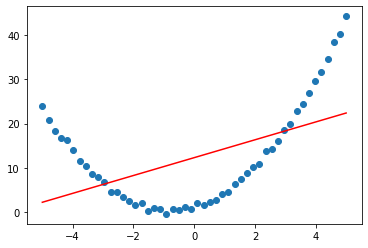

In [3]:
Input1_1 = keras.Input(shape=(1)) # 自变量是个标量

Linear_layer1_1 = keras.layers.Dense(10) (Input1_1)
Linear_layer1_out = keras.layers.Dense(1) (Linear_layer1_1) # 线性输出层

Linear_Model = keras.Model(inputs=Input1_1, outputs=Linear_layer1_out)

Linear_Model.compile(loss='mse')
Linear_Model.fit(x=x, y=y, epochs=1000)

Linear_pred = Linear_Model(np.reshape(x, [-1, 1]))

plt.scatter(x, y)
plt.plot(x, Linear_pred, color='r') 

Train on 50 samples
Epoch 1/1000
50/50 [==============================] - 0s 6ms/sample - loss: 280.3283
Epoch 2/1000
50/50 [==============================] - 0s 179us/sample - loss: 279.4149
Epoch 3/1000
50/50 [==============================] - 0s 200us/sample - loss: 278.8084
Epoch 4/1000
50/50 [==============================] - 0s 199us/sample - loss: 278.3155
Epoch 5/1000
50/50 [==============================] - 0s 179us/sample - loss: 277.8641
Epoch 6/1000
50/50 [==============================] - 0s 179us/sample - loss: 277.4264
Epoch 7/1000
50/50 [==============================] - 0s 160us/sample - loss: 277.0255
Epoch 8/1000
50/50 [==============================] - 0s 180us/sample - loss: 276.6699
Epoch 9/1000
50/50 [==============================] - 0s 199us/sample - loss: 276.3269
Epoch 10/1000
50/50 [==============================] - 0s 180us/sample - loss: 275.9558
Epoch 11/1000
50/50 [==============================] - 0s 160us/sample - loss: 275.5750
Epoch 12/1000
50/50 [==

Epoch 94/1000
50/50 [==============================] - 0s 160us/sample - loss: 245.7758
Epoch 95/1000
50/50 [==============================] - 0s 180us/sample - loss: 245.4336
Epoch 96/1000
50/50 [==============================] - 0s 160us/sample - loss: 245.0413
Epoch 97/1000
50/50 [==============================] - 0s 140us/sample - loss: 244.6780
Epoch 98/1000
50/50 [==============================] - 0s 199us/sample - loss: 244.3332
Epoch 99/1000
50/50 [==============================] - 0s 140us/sample - loss: 244.0050
Epoch 100/1000
50/50 [==============================] - 0s 199us/sample - loss: 243.6753
Epoch 101/1000
50/50 [==============================] - 0s 140us/sample - loss: 243.3303
Epoch 102/1000
50/50 [==============================] - 0s 180us/sample - loss: 242.9870
Epoch 103/1000
50/50 [==============================] - 0s 120us/sample - loss: 242.6343
Epoch 104/1000
50/50 [==============================] - 0s 180us/sample - loss: 242.2594
Epoch 105/1000
50/50 [=====

50/50 [==============================] - 0s 160us/sample - loss: 213.7141
Epoch 187/1000
50/50 [==============================] - 0s 140us/sample - loss: 213.3673
Epoch 188/1000
50/50 [==============================] - 0s 180us/sample - loss: 213.0239
Epoch 189/1000
50/50 [==============================] - 0s 160us/sample - loss: 212.6771
Epoch 190/1000
50/50 [==============================] - 0s 140us/sample - loss: 212.3374
Epoch 191/1000
50/50 [==============================] - 0s 198us/sample - loss: 212.0204
Epoch 192/1000
50/50 [==============================] - 0s 120us/sample - loss: 211.6735
Epoch 193/1000
50/50 [==============================] - 0s 180us/sample - loss: 211.3180
Epoch 194/1000
50/50 [==============================] - 0s 139us/sample - loss: 210.9618
Epoch 195/1000
50/50 [==============================] - 0s 160us/sample - loss: 210.6233
Epoch 196/1000
50/50 [==============================] - 0s 140us/sample - loss: 210.2902
Epoch 197/1000
50/50 [==============

Epoch 278/1000
50/50 [==============================] - 0s 160us/sample - loss: 184.1489
Epoch 279/1000
50/50 [==============================] - 0s 160us/sample - loss: 183.8832
Epoch 280/1000
50/50 [==============================] - 0s 140us/sample - loss: 183.6417
Epoch 281/1000
50/50 [==============================] - 0s 179us/sample - loss: 183.3862
Epoch 282/1000
50/50 [==============================] - 0s 160us/sample - loss: 183.1064
Epoch 283/1000
50/50 [==============================] - 0s 119us/sample - loss: 182.8078
Epoch 284/1000
50/50 [==============================] - 0s 159us/sample - loss: 182.5023
Epoch 285/1000
50/50 [==============================] - 0s 140us/sample - loss: 182.2164
Epoch 286/1000
50/50 [==============================] - 0s 180us/sample - loss: 181.9404
Epoch 287/1000
50/50 [==============================] - 0s 159us/sample - loss: 181.6657
Epoch 288/1000
50/50 [==============================] - 0s 160us/sample - loss: 181.3721
Epoch 289/1000
50/50 

50/50 [==============================] - 0s 219us/sample - loss: 160.3990
Epoch 370/1000
50/50 [==============================] - 0s 160us/sample - loss: 160.1912
Epoch 371/1000
50/50 [==============================] - 0s 160us/sample - loss: 159.9752
Epoch 372/1000
50/50 [==============================] - 0s 160us/sample - loss: 159.7483
Epoch 373/1000
50/50 [==============================] - 0s 180us/sample - loss: 159.5206
Epoch 374/1000
50/50 [==============================] - 0s 159us/sample - loss: 159.3032
Epoch 375/1000
50/50 [==============================] - 0s 140us/sample - loss: 159.0348
Epoch 376/1000
50/50 [==============================] - 0s 179us/sample - loss: 158.8354
Epoch 377/1000
50/50 [==============================] - 0s 140us/sample - loss: 158.6326
Epoch 378/1000
50/50 [==============================] - 0s 139us/sample - loss: 158.3798
Epoch 379/1000
50/50 [==============================] - 0s 140us/sample - loss: 158.1649
Epoch 380/1000
50/50 [==============

50/50 [==============================] - 0s 180us/sample - loss: 142.0625
Epoch 462/1000
50/50 [==============================] - 0s 160us/sample - loss: 141.9059
Epoch 463/1000
50/50 [==============================] - 0s 180us/sample - loss: 141.7230
Epoch 464/1000
50/50 [==============================] - 0s 179us/sample - loss: 141.5690
Epoch 465/1000
50/50 [==============================] - 0s 160us/sample - loss: 141.3559
Epoch 466/1000
50/50 [==============================] - 0s 160us/sample - loss: 141.1777
Epoch 467/1000
50/50 [==============================] - 0s 139us/sample - loss: 140.9822
Epoch 468/1000
50/50 [==============================] - 0s 159us/sample - loss: 140.8122
Epoch 469/1000
50/50 [==============================] - 0s 160us/sample - loss: 140.6591
Epoch 470/1000
50/50 [==============================] - 0s 180us/sample - loss: 140.5118
Epoch 471/1000
50/50 [==============================] - 0s 120us/sample - loss: 140.3228
Epoch 472/1000
50/50 [==============

50/50 [==============================] - 0s 160us/sample - loss: 128.2176
Epoch 554/1000
50/50 [==============================] - 0s 120us/sample - loss: 128.0907
Epoch 555/1000
50/50 [==============================] - 0s 139us/sample - loss: 127.9318
Epoch 556/1000
50/50 [==============================] - 0s 120us/sample - loss: 127.8245
Epoch 557/1000
50/50 [==============================] - 0s 180us/sample - loss: 127.6444
Epoch 558/1000
50/50 [==============================] - 0s 139us/sample - loss: 127.5112
Epoch 559/1000
50/50 [==============================] - 0s 179us/sample - loss: 127.4030
Epoch 560/1000
50/50 [==============================] - 0s 139us/sample - loss: 127.2911
Epoch 561/1000
50/50 [==============================] - 0s 179us/sample - loss: 127.1899
Epoch 562/1000
50/50 [==============================] - 0s 180us/sample - loss: 127.0936
Epoch 563/1000
50/50 [==============================] - 0s 160us/sample - loss: 126.9731
Epoch 564/1000
50/50 [==============

50/50 [==============================] - 0s 140us/sample - loss: 118.6134
Epoch 646/1000
50/50 [==============================] - 0s 159us/sample - loss: 118.5403
Epoch 647/1000
50/50 [==============================] - 0s 119us/sample - loss: 118.4712
Epoch 648/1000
50/50 [==============================] - 0s 160us/sample - loss: 118.4281
Epoch 649/1000
50/50 [==============================] - 0s 140us/sample - loss: 118.3394
Epoch 650/1000
50/50 [==============================] - 0s 179us/sample - loss: 118.2507
Epoch 651/1000
50/50 [==============================] - 0s 139us/sample - loss: 118.1641
Epoch 652/1000
50/50 [==============================] - 0s 160us/sample - loss: 118.0706
Epoch 653/1000
50/50 [==============================] - 0s 139us/sample - loss: 117.9752
Epoch 654/1000
50/50 [==============================] - 0s 239us/sample - loss: 117.8962
Epoch 655/1000
50/50 [==============================] - 0s 179us/sample - loss: 117.8098
Epoch 656/1000
50/50 [==============

50/50 [==============================] - 0s 159us/sample - loss: 112.2848
Epoch 738/1000
50/50 [==============================] - 0s 180us/sample - loss: 112.2119
Epoch 739/1000
50/50 [==============================] - 0s 139us/sample - loss: 112.1770
Epoch 740/1000
50/50 [==============================] - 0s 179us/sample - loss: 112.1327
Epoch 741/1000
50/50 [==============================] - 0s 159us/sample - loss: 112.0947
Epoch 742/1000
50/50 [==============================] - 0s 139us/sample - loss: 112.0471
Epoch 743/1000
50/50 [==============================] - 0s 179us/sample - loss: 111.9775
Epoch 744/1000
50/50 [==============================] - 0s 160us/sample - loss: 111.9327
Epoch 745/1000
50/50 [==============================] - 0s 160us/sample - loss: 111.8706
Epoch 746/1000
50/50 [==============================] - 0s 140us/sample - loss: 111.8138
Epoch 747/1000
50/50 [==============================] - 0s 179us/sample - loss: 111.7652
Epoch 748/1000
50/50 [==============

50/50 [==============================] - 0s 160us/sample - loss: 107.9346
Epoch 830/1000
50/50 [==============================] - 0s 142us/sample - loss: 107.8829
Epoch 831/1000
50/50 [==============================] - 0s 160us/sample - loss: 107.8554
Epoch 832/1000
50/50 [==============================] - 0s 140us/sample - loss: 107.7940
Epoch 833/1000
50/50 [==============================] - 0s 180us/sample - loss: 107.7537
Epoch 834/1000
50/50 [==============================] - 0s 119us/sample - loss: 107.7038
Epoch 835/1000
50/50 [==============================] - 0s 160us/sample - loss: 107.6772
Epoch 836/1000
50/50 [==============================] - 0s 119us/sample - loss: 107.6266
Epoch 837/1000
50/50 [==============================] - 0s 160us/sample - loss: 107.5866
Epoch 838/1000
50/50 [==============================] - 0s 119us/sample - loss: 107.5518
Epoch 839/1000
50/50 [==============================] - 0s 160us/sample - loss: 107.5420
Epoch 840/1000
50/50 [==============

50/50 [==============================] - 0s 140us/sample - loss: 104.1806
Epoch 922/1000
50/50 [==============================] - 0s 180us/sample - loss: 104.1343
Epoch 923/1000
50/50 [==============================] - 0s 160us/sample - loss: 104.0887
Epoch 924/1000
50/50 [==============================] - 0s 159us/sample - loss: 104.0437
Epoch 925/1000
50/50 [==============================] - 0s 159us/sample - loss: 104.0247
Epoch 926/1000
50/50 [==============================] - 0s 140us/sample - loss: 103.9579
Epoch 927/1000
50/50 [==============================] - 0s 180us/sample - loss: 103.9532
Epoch 928/1000
50/50 [==============================] - 0s 160us/sample - loss: 103.8973
Epoch 929/1000
50/50 [==============================] - 0s 179us/sample - loss: 103.8631
Epoch 930/1000
50/50 [==============================] - 0s 140us/sample - loss: 103.8108
Epoch 931/1000
50/50 [==============================] - 0s 199us/sample - loss: 103.7633
Epoch 932/1000
50/50 [==============

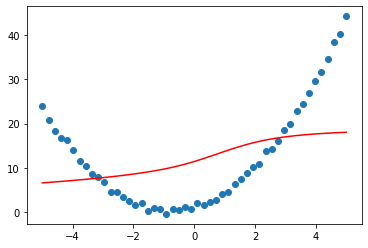

In [4]:
# 之前定义的input可以重复使用

Sigmoid_layer1_1 = keras.layers.Dense(10, activation='sigmoid') (Input1_1)
Sigmoid_layer1_out = keras.layers.Dense(1) (Sigmoid_layer1_1) # 线性输出层
# 输出之所以没使用sigmoid，是因为这个函数的值域为(0,1)

Sigmoid_Model = keras.Model(inputs=Input1_1, outputs=Sigmoid_layer1_out)

Sigmoid_Model.compile(loss='mse')
Sigmoid_Model.fit(x=x, y=y, epochs=1000)

Sigmoid_pred = Sigmoid_Model(np.reshape(x, [-1, 1]))

plt.scatter(x, y)
plt.plot(x, Sigmoid_pred, color='r')

训练10000轮：![](pic\11.png)

Train on 50 samples
Epoch 1/1000
50/50 [==============================] - 0s 7ms/sample - loss: 285.5099
Epoch 2/1000
50/50 [==============================] - 0s 160us/sample - loss: 285.1353
Epoch 3/1000
50/50 [==============================] - 0s 120us/sample - loss: 284.8975
Epoch 4/1000
50/50 [==============================] - 0s 180us/sample - loss: 284.6977
Epoch 5/1000
50/50 [==============================] - 0s 180us/sample - loss: 284.5045
Epoch 6/1000
50/50 [==============================] - 0s 159us/sample - loss: 284.2922
Epoch 7/1000
50/50 [==============================] - 0s 160us/sample - loss: 282.9981
Epoch 8/1000
50/50 [==============================] - 0s 160us/sample - loss: 281.1098
Epoch 9/1000
50/50 [==============================] - 0s 160us/sample - loss: 279.8384
Epoch 10/1000
50/50 [==============================] - 0s 160us/sample - loss: 278.7572
Epoch 11/1000
50/50 [==============================] - 0s 179us/sample - loss: 277.7484
Epoch 12/1000
50/50 [==

Epoch 94/1000
50/50 [==============================] - 0s 160us/sample - loss: 212.9729
Epoch 95/1000
50/50 [==============================] - 0s 160us/sample - loss: 212.2036
Epoch 96/1000
50/50 [==============================] - 0s 160us/sample - loss: 211.4822
Epoch 97/1000
50/50 [==============================] - 0s 120us/sample - loss: 210.7365
Epoch 98/1000
50/50 [==============================] - 0s 159us/sample - loss: 210.0204
Epoch 99/1000
50/50 [==============================] - 0s 160us/sample - loss: 209.2664
Epoch 100/1000
50/50 [==============================] - 0s 139us/sample - loss: 208.5555
Epoch 101/1000
50/50 [==============================] - 0s 160us/sample - loss: 207.8554
Epoch 102/1000
50/50 [==============================] - 0s 180us/sample - loss: 207.1422
Epoch 103/1000
50/50 [==============================] - 0s 140us/sample - loss: 206.4449
Epoch 104/1000
50/50 [==============================] - 0s 199us/sample - loss: 205.7232
Epoch 105/1000
50/50 [=====

50/50 [==============================] - 0s 140us/sample - loss: 145.9568
Epoch 187/1000
50/50 [==============================] - 0s 159us/sample - loss: 145.2174
Epoch 188/1000
50/50 [==============================] - 0s 179us/sample - loss: 144.4739
Epoch 189/1000
50/50 [==============================] - 0s 160us/sample - loss: 143.8183
Epoch 190/1000
50/50 [==============================] - 0s 140us/sample - loss: 143.1624
Epoch 191/1000
50/50 [==============================] - 0s 139us/sample - loss: 142.5115
Epoch 192/1000
50/50 [==============================] - 0s 140us/sample - loss: 141.8062
Epoch 193/1000
50/50 [==============================] - 0s 140us/sample - loss: 141.1067
Epoch 194/1000
50/50 [==============================] - 0s 120us/sample - loss: 140.4237
Epoch 195/1000
50/50 [==============================] - 0s 159us/sample - loss: 139.6936
Epoch 196/1000
50/50 [==============================] - 0s 140us/sample - loss: 138.9318
Epoch 197/1000
50/50 [==============

50/50 [==============================] - 0s 160us/sample - loss: 86.3452
Epoch 279/1000
50/50 [==============================] - 0s 140us/sample - loss: 85.7762
Epoch 280/1000
50/50 [==============================] - 0s 160us/sample - loss: 85.1885
Epoch 281/1000
50/50 [==============================] - 0s 179us/sample - loss: 84.5905
Epoch 282/1000
50/50 [==============================] - 0s 140us/sample - loss: 84.0095
Epoch 283/1000
50/50 [==============================] - 0s 179us/sample - loss: 83.4596
Epoch 284/1000
50/50 [==============================] - 0s 159us/sample - loss: 82.9487
Epoch 285/1000
50/50 [==============================] - 0s 160us/sample - loss: 82.4292
Epoch 286/1000
50/50 [==============================] - 0s 139us/sample - loss: 81.8712
Epoch 287/1000
50/50 [==============================] - 0s 160us/sample - loss: 81.3027
Epoch 288/1000
50/50 [==============================] - 0s 159us/sample - loss: 80.8102
Epoch 289/1000
50/50 [=========================

50/50 [==============================] - 0s 180us/sample - loss: 42.8541
Epoch 372/1000
50/50 [==============================] - 0s 158us/sample - loss: 42.4435
Epoch 373/1000
50/50 [==============================] - 0s 180us/sample - loss: 42.0928
Epoch 374/1000
50/50 [==============================] - 0s 179us/sample - loss: 41.7708
Epoch 375/1000
50/50 [==============================] - 0s 140us/sample - loss: 41.4364
Epoch 376/1000
50/50 [==============================] - 0s 180us/sample - loss: 41.1225
Epoch 377/1000
50/50 [==============================] - 0s 140us/sample - loss: 40.7700
Epoch 378/1000
50/50 [==============================] - 0s 159us/sample - loss: 40.4155
Epoch 379/1000
50/50 [==============================] - 0s 140us/sample - loss: 40.0721
Epoch 380/1000
50/50 [==============================] - 0s 160us/sample - loss: 39.7377
Epoch 381/1000
50/50 [==============================] - 0s 160us/sample - loss: 39.4384
Epoch 382/1000
50/50 [=========================

50/50 [==============================] - 0s 139us/sample - loss: 22.4492
Epoch 465/1000
50/50 [==============================] - 0s 180us/sample - loss: 22.3439
Epoch 466/1000
50/50 [==============================] - 0s 160us/sample - loss: 22.2273
Epoch 467/1000
50/50 [==============================] - 0s 180us/sample - loss: 22.1337
Epoch 468/1000
50/50 [==============================] - 0s 160us/sample - loss: 22.0170
Epoch 469/1000
50/50 [==============================] - 0s 140us/sample - loss: 21.9401
Epoch 470/1000
50/50 [==============================] - 0s 159us/sample - loss: 21.8110
Epoch 471/1000
50/50 [==============================] - 0s 160us/sample - loss: 21.7179
Epoch 472/1000
50/50 [==============================] - 0s 160us/sample - loss: 21.6424
Epoch 473/1000
50/50 [==============================] - 0s 160us/sample - loss: 21.5568
Epoch 474/1000
50/50 [==============================] - 0s 159us/sample - loss: 21.4747
Epoch 475/1000
50/50 [=========================

50/50 [==============================] - 0s 160us/sample - loss: 17.5935
Epoch 558/1000
50/50 [==============================] - 0s 199us/sample - loss: 17.5570
Epoch 559/1000
50/50 [==============================] - 0s 180us/sample - loss: 17.5092
Epoch 560/1000
50/50 [==============================] - 0s 160us/sample - loss: 17.5322
Epoch 561/1000
50/50 [==============================] - 0s 140us/sample - loss: 17.4910
Epoch 562/1000
50/50 [==============================] - 0s 160us/sample - loss: 17.4114
Epoch 563/1000
50/50 [==============================] - 0s 160us/sample - loss: 17.3827
Epoch 564/1000
50/50 [==============================] - 0s 179us/sample - loss: 17.3523
Epoch 565/1000
50/50 [==============================] - 0s 140us/sample - loss: 17.3446
Epoch 566/1000
50/50 [==============================] - 0s 180us/sample - loss: 17.2857
Epoch 567/1000
50/50 [==============================] - 0s 120us/sample - loss: 17.2570
Epoch 568/1000
50/50 [=========================

50/50 [==============================] - 0s 160us/sample - loss: 14.6449
Epoch 651/1000
50/50 [==============================] - 0s 160us/sample - loss: 14.6306
Epoch 652/1000
50/50 [==============================] - 0s 120us/sample - loss: 14.5918
Epoch 653/1000
50/50 [==============================] - 0s 160us/sample - loss: 14.5629
Epoch 654/1000
50/50 [==============================] - 0s 100us/sample - loss: 14.5645
Epoch 655/1000
50/50 [==============================] - 0s 160us/sample - loss: 14.5090
Epoch 656/1000
50/50 [==============================] - 0s 120us/sample - loss: 14.4699
Epoch 657/1000
50/50 [==============================] - 0s 160us/sample - loss: 14.4521
Epoch 658/1000
50/50 [==============================] - 0s 140us/sample - loss: 14.4240
Epoch 659/1000
50/50 [==============================] - 0s 180us/sample - loss: 14.4417
Epoch 660/1000
50/50 [==============================] - 0s 140us/sample - loss: 14.4000
Epoch 661/1000
50/50 [=========================

50/50 [==============================] - 0s 160us/sample - loss: 12.1656
Epoch 744/1000
50/50 [==============================] - 0s 160us/sample - loss: 12.1348
Epoch 745/1000
50/50 [==============================] - 0s 279us/sample - loss: 12.1006
Epoch 746/1000
50/50 [==============================] - 0s 160us/sample - loss: 12.0801
Epoch 747/1000
50/50 [==============================] - 0s 199us/sample - loss: 12.0500
Epoch 748/1000
50/50 [==============================] - 0s 140us/sample - loss: 12.0180
Epoch 749/1000
50/50 [==============================] - 0s 219us/sample - loss: 11.9907
Epoch 750/1000
50/50 [==============================] - 0s 179us/sample - loss: 11.9767
Epoch 751/1000
50/50 [==============================] - 0s 140us/sample - loss: 11.9448
Epoch 752/1000
50/50 [==============================] - 0s 160us/sample - loss: 11.9177
Epoch 753/1000
50/50 [==============================] - 0s 140us/sample - loss: 11.8960
Epoch 754/1000
50/50 [=========================

50/50 [==============================] - 0s 160us/sample - loss: 10.0044
Epoch 837/1000
50/50 [==============================] - 0s 160us/sample - loss: 9.9816
Epoch 838/1000
50/50 [==============================] - 0s 160us/sample - loss: 9.9539
Epoch 839/1000
50/50 [==============================] - 0s 160us/sample - loss: 9.9362
Epoch 840/1000
50/50 [==============================] - 0s 140us/sample - loss: 9.9207
Epoch 841/1000
50/50 [==============================] - 0s 160us/sample - loss: 9.8961
Epoch 842/1000
50/50 [==============================] - 0s 140us/sample - loss: 9.8975
Epoch 843/1000
50/50 [==============================] - 0s 180us/sample - loss: 9.8684
Epoch 844/1000
50/50 [==============================] - 0s 140us/sample - loss: 9.8390
Epoch 845/1000
50/50 [==============================] - 0s 180us/sample - loss: 9.8482
Epoch 846/1000
50/50 [==============================] - 0s 120us/sample - loss: 9.8296
Epoch 847/1000
50/50 [==============================] - 0

50/50 [==============================] - 0s 160us/sample - loss: 8.1830
Epoch 931/1000
50/50 [==============================] - 0s 140us/sample - loss: 8.1823
Epoch 932/1000
50/50 [==============================] - 0s 179us/sample - loss: 8.1448
Epoch 933/1000
50/50 [==============================] - 0s 180us/sample - loss: 8.1284
Epoch 934/1000
50/50 [==============================] - 0s 140us/sample - loss: 8.1670
Epoch 935/1000
50/50 [==============================] - 0s 180us/sample - loss: 8.1003
Epoch 936/1000
50/50 [==============================] - 0s 140us/sample - loss: 8.0759
Epoch 937/1000
50/50 [==============================] - 0s 160us/sample - loss: 8.0710
Epoch 938/1000
50/50 [==============================] - 0s 160us/sample - loss: 8.0795
Epoch 939/1000
50/50 [==============================] - 0s 160us/sample - loss: 8.0301
Epoch 940/1000
50/50 [==============================] - 0s 120us/sample - loss: 8.0101
Epoch 941/1000
50/50 [==============================] - 0s

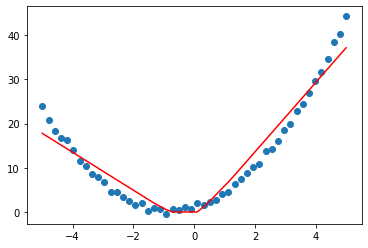

In [5]:
# 之前定义的input可以重复使用

Relu_layer1_1 = keras.layers.Dense(10, activation='relu') (Input1_1)
Relu_layer1_out = keras.layers.Dense(1, activation='relu') (Relu_layer1_1) # 线性输出层

Relu_Model = keras.Model(inputs=Input1_1, outputs=Relu_layer1_out)

Relu_Model.compile(loss='mse')
Relu_Model.fit(x=x, y=y, epochs=1000)

Relu_pred = Relu_Model(np.reshape(x, [-1, 1]))

plt.scatter(x, y)
plt.plot(x, Relu_pred, color='r')

可以看到，relu的表现相比之下还是不错的，之前说的有趣的效果也在这里，使用sigmoid的模型，拟合出来的曲线是弯曲圆润的。而使用relu的模型，你和出来的曲线是刚直，有棱角的。

接下来我们提升一下神经网络的层数，线性模型添加网络没啥用，所以这里只展示使用sigmoid函数和relu函数的模型。

Train on 50 samples
Epoch 1/1000
50/50 [==============================] - 0s 8ms/sample - loss: 308.2020
Epoch 2/1000
50/50 [==============================] - 0s 160us/sample - loss: 301.2493
Epoch 3/1000
50/50 [==============================] - 0s 179us/sample - loss: 296.4526
Epoch 4/1000
50/50 [==============================] - 0s 179us/sample - loss: 292.5569
Epoch 5/1000
50/50 [==============================] - 0s 199us/sample - loss: 289.1841
Epoch 6/1000
50/50 [==============================] - 0s 199us/sample - loss: 286.0608
Epoch 7/1000
50/50 [==============================] - 0s 199us/sample - loss: 283.1797
Epoch 8/1000
50/50 [==============================] - 0s 180us/sample - loss: 280.4626
Epoch 9/1000
50/50 [==============================] - 0s 179us/sample - loss: 277.9386
Epoch 10/1000
50/50 [==============================] - 0s 179us/sample - loss: 275.4690
Epoch 11/1000
50/50 [==============================] - 0s 179us/sample - loss: 273.0482
Epoch 12/1000
50/50 [==

50/50 [==============================] - 0s 160us/sample - loss: 198.3887
Epoch 94/1000
50/50 [==============================] - 0s 160us/sample - loss: 197.9300
Epoch 95/1000
50/50 [==============================] - 0s 179us/sample - loss: 197.4303
Epoch 96/1000
50/50 [==============================] - 0s 180us/sample - loss: 196.8914
Epoch 97/1000
50/50 [==============================] - 0s 180us/sample - loss: 196.3489
Epoch 98/1000
50/50 [==============================] - 0s 160us/sample - loss: 195.8196
Epoch 99/1000
50/50 [==============================] - 0s 199us/sample - loss: 195.2706
Epoch 100/1000
50/50 [==============================] - 0s 140us/sample - loss: 194.7369
Epoch 101/1000
50/50 [==============================] - 0s 179us/sample - loss: 194.2560
Epoch 102/1000
50/50 [==============================] - 0s 140us/sample - loss: 193.7756
Epoch 103/1000
50/50 [==============================] - 0s 180us/sample - loss: 193.2786
Epoch 104/1000
50/50 [====================

50/50 [==============================] - 0s 160us/sample - loss: 159.0874
Epoch 186/1000
50/50 [==============================] - 0s 140us/sample - loss: 158.7234
Epoch 187/1000
50/50 [==============================] - 0s 180us/sample - loss: 158.3949
Epoch 188/1000
50/50 [==============================] - 0s 160us/sample - loss: 158.0221
Epoch 189/1000
50/50 [==============================] - 0s 179us/sample - loss: 157.7356
Epoch 190/1000
50/50 [==============================] - 0s 140us/sample - loss: 157.3730
Epoch 191/1000
50/50 [==============================] - 0s 199us/sample - loss: 157.0951
Epoch 192/1000
50/50 [==============================] - 0s 160us/sample - loss: 156.8034
Epoch 193/1000
50/50 [==============================] - 0s 160us/sample - loss: 156.4983
Epoch 194/1000
50/50 [==============================] - 0s 160us/sample - loss: 156.2290
Epoch 195/1000
50/50 [==============================] - 0s 160us/sample - loss: 155.9849
Epoch 196/1000
50/50 [==============

50/50 [==============================] - 0s 160us/sample - loss: 139.3647
Epoch 278/1000
50/50 [==============================] - 0s 120us/sample - loss: 139.3878
Epoch 279/1000
50/50 [==============================] - 0s 180us/sample - loss: 139.2459
Epoch 280/1000
50/50 [==============================] - 0s 140us/sample - loss: 139.1677
Epoch 281/1000
50/50 [==============================] - 0s 180us/sample - loss: 139.0823
Epoch 282/1000
50/50 [==============================] - 0s 140us/sample - loss: 138.9771
Epoch 283/1000
50/50 [==============================] - 0s 160us/sample - loss: 138.8883
Epoch 284/1000
50/50 [==============================] - 0s 140us/sample - loss: 138.8165
Epoch 285/1000
50/50 [==============================] - 0s 180us/sample - loss: 138.7300
Epoch 286/1000
50/50 [==============================] - 0s 140us/sample - loss: 138.7254
Epoch 287/1000
50/50 [==============================] - 0s 180us/sample - loss: 138.5378
Epoch 288/1000
50/50 [==============

50/50 [==============================] - 0s 140us/sample - loss: 133.0520
Epoch 370/1000
50/50 [==============================] - 0s 199us/sample - loss: 132.9318
Epoch 371/1000
50/50 [==============================] - 0s 140us/sample - loss: 132.8155
Epoch 372/1000
50/50 [==============================] - 0s 180us/sample - loss: 132.7002
Epoch 373/1000
50/50 [==============================] - 0s 160us/sample - loss: 132.5722
Epoch 374/1000
50/50 [==============================] - 0s 160us/sample - loss: 132.6088
Epoch 375/1000
50/50 [==============================] - 0s 160us/sample - loss: 132.3312
Epoch 376/1000
50/50 [==============================] - 0s 160us/sample - loss: 132.2200
Epoch 377/1000
50/50 [==============================] - 0s 160us/sample - loss: 132.1149
Epoch 378/1000
50/50 [==============================] - 0s 140us/sample - loss: 131.9777
Epoch 379/1000
50/50 [==============================] - 0s 180us/sample - loss: 131.8344
Epoch 380/1000
50/50 [==============

Epoch 461/1000
50/50 [==============================] - 0s 180us/sample - loss: 114.9559
Epoch 462/1000
50/50 [==============================] - 0s 160us/sample - loss: 114.7047
Epoch 463/1000
50/50 [==============================] - 0s 199us/sample - loss: 114.4170
Epoch 464/1000
50/50 [==============================] - 0s 160us/sample - loss: 114.0888
Epoch 465/1000
50/50 [==============================] - 0s 179us/sample - loss: 113.8388
Epoch 466/1000
50/50 [==============================] - 0s 180us/sample - loss: 113.5382
Epoch 467/1000
50/50 [==============================] - 0s 160us/sample - loss: 113.2583
Epoch 468/1000
50/50 [==============================] - 0s 200us/sample - loss: 112.9642
Epoch 469/1000
50/50 [==============================] - 0s 140us/sample - loss: 112.7202
Epoch 470/1000
50/50 [==============================] - 0s 219us/sample - loss: 112.4050
Epoch 471/1000
50/50 [==============================] - 0s 160us/sample - loss: 112.0969
Epoch 472/1000
50/50 

50/50 [==============================] - 0s 180us/sample - loss: 84.3787
Epoch 554/1000
50/50 [==============================] - 0s 160us/sample - loss: 83.9862
Epoch 555/1000
50/50 [==============================] - 0s 180us/sample - loss: 83.5819
Epoch 556/1000
50/50 [==============================] - 0s 180us/sample - loss: 83.1511
Epoch 557/1000
50/50 [==============================] - 0s 179us/sample - loss: 82.7538
Epoch 558/1000
50/50 [==============================] - 0s 180us/sample - loss: 82.3391
Epoch 559/1000
50/50 [==============================] - 0s 160us/sample - loss: 81.9326
Epoch 560/1000
50/50 [==============================] - 0s 180us/sample - loss: 81.5458
Epoch 561/1000
50/50 [==============================] - 0s 160us/sample - loss: 81.1782
Epoch 562/1000
50/50 [==============================] - 0s 180us/sample - loss: 80.7989
Epoch 563/1000
50/50 [==============================] - 0s 160us/sample - loss: 80.3796
Epoch 564/1000
50/50 [=========================

50/50 [==============================] - 0s 180us/sample - loss: 54.2915
Epoch 647/1000
50/50 [==============================] - 0s 160us/sample - loss: 54.0472
Epoch 648/1000
50/50 [==============================] - 0s 179us/sample - loss: 53.7478
Epoch 649/1000
50/50 [==============================] - 0s 140us/sample - loss: 53.4720
Epoch 650/1000
50/50 [==============================] - 0s 180us/sample - loss: 53.2071
Epoch 651/1000
50/50 [==============================] - 0s 180us/sample - loss: 52.9545
Epoch 652/1000
50/50 [==============================] - 0s 179us/sample - loss: 52.6700
Epoch 653/1000
50/50 [==============================] - 0s 239us/sample - loss: 52.4392
Epoch 654/1000
50/50 [==============================] - 0s 160us/sample - loss: 52.1682
Epoch 655/1000
50/50 [==============================] - 0s 180us/sample - loss: 51.9071
Epoch 656/1000
50/50 [==============================] - 0s 180us/sample - loss: 51.6461
Epoch 657/1000
50/50 [=========================

50/50 [==============================] - 0s 120us/sample - loss: 30.4251
Epoch 740/1000
50/50 [==============================] - 0s 199us/sample - loss: 30.1764
Epoch 741/1000
50/50 [==============================] - 0s 140us/sample - loss: 29.9530
Epoch 742/1000
50/50 [==============================] - 0s 259us/sample - loss: 29.6551
Epoch 743/1000
50/50 [==============================] - 0s 199us/sample - loss: 29.4476
Epoch 744/1000
50/50 [==============================] - 0s 199us/sample - loss: 29.2445
Epoch 745/1000
50/50 [==============================] - 0s 180us/sample - loss: 29.0635
Epoch 746/1000
50/50 [==============================] - 0s 180us/sample - loss: 28.7574
Epoch 747/1000
50/50 [==============================] - 0s 140us/sample - loss: 28.5884
Epoch 748/1000
50/50 [==============================] - 0s 180us/sample - loss: 28.3105
Epoch 749/1000
50/50 [==============================] - 0s 140us/sample - loss: 28.0671
Epoch 750/1000
50/50 [=========================

50/50 [==============================] - 0s 140us/sample - loss: 13.6991
Epoch 833/1000
50/50 [==============================] - 0s 160us/sample - loss: 13.5467
Epoch 834/1000
50/50 [==============================] - 0s 120us/sample - loss: 13.4006
Epoch 835/1000
50/50 [==============================] - 0s 180us/sample - loss: 13.2511
Epoch 836/1000
50/50 [==============================] - 0s 120us/sample - loss: 13.1155
Epoch 837/1000
50/50 [==============================] - 0s 160us/sample - loss: 12.9951
Epoch 838/1000
50/50 [==============================] - 0s 120us/sample - loss: 12.8605
Epoch 839/1000
50/50 [==============================] - 0s 159us/sample - loss: 12.7362
Epoch 840/1000
50/50 [==============================] - 0s 140us/sample - loss: 12.6268
Epoch 841/1000
50/50 [==============================] - 0s 160us/sample - loss: 12.5082
Epoch 842/1000
50/50 [==============================] - 0s 120us/sample - loss: 12.4200
Epoch 843/1000
50/50 [=========================

Epoch 926/1000
50/50 [==============================] - 0s 180us/sample - loss: 5.3204
Epoch 927/1000
50/50 [==============================] - 0s 160us/sample - loss: 5.2716
Epoch 928/1000
50/50 [==============================] - 0s 160us/sample - loss: 5.2285
Epoch 929/1000
50/50 [==============================] - 0s 180us/sample - loss: 5.1703
Epoch 930/1000
50/50 [==============================] - 0s 160us/sample - loss: 5.1623
Epoch 931/1000
50/50 [==============================] - 0s 180us/sample - loss: 5.0759
Epoch 932/1000
50/50 [==============================] - 0s 179us/sample - loss: 5.0158
Epoch 933/1000
50/50 [==============================] - 0s 199us/sample - loss: 5.0507
Epoch 934/1000
50/50 [==============================] - 0s 160us/sample - loss: 4.9977
Epoch 935/1000
50/50 [==============================] - 0s 180us/sample - loss: 4.8722
Epoch 936/1000
50/50 [==============================] - 0s 160us/sample - loss: 4.8045
Epoch 937/1000
50/50 [=====================

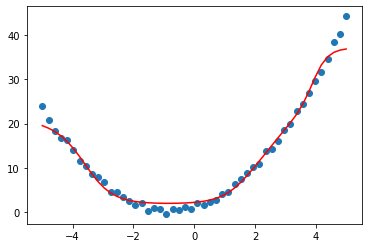

In [8]:
Input2_1 = keras.Input(shape=(1)) # 重新定义一个输入，其实使用之前的也行。

sig_layer2_1 = keras.layers.Dense(25, activation='sigmoid') (Input2_1)
sig_layer2_2 = keras.layers.Dense(50, activation='sigmoid') (sig_layer2_1) # 网络中间层的输出个数也可以自行进行更改
sig_layer2_3 = keras.layers.Dense(25, activation='sigmoid') (sig_layer2_2)
sig_layer2_out = keras.layers.Dense(1) (sig_layer2_3)

Sigmoid_Model2 = keras.Model(inputs=Input2_1, outputs=sig_layer2_out)

Sigmoid_Model2.compile(loss='mse')
Sigmoid_Model2.fit(x=x, y=y, epochs=1000)

Sigmoid_pred2 = Sigmoid_Model2(np.reshape(x, [-1, 1]))

plt.scatter(x, y)
plt.plot(x, Sigmoid_pred2, color='r')

Train on 50 samples
Epoch 1/500
50/50 [==============================] - 0s 9ms/sample - loss: 284.6785
Epoch 2/500
50/50 [==============================] - 0s 199us/sample - loss: 282.8538
Epoch 3/500
50/50 [==============================] - 0s 199us/sample - loss: 278.9403
Epoch 4/500
50/50 [==============================] - 0s 199us/sample - loss: 274.9254
Epoch 5/500
50/50 [==============================] - 0s 180us/sample - loss: 270.4982
Epoch 6/500
50/50 [==============================] - 0s 180us/sample - loss: 266.3882
Epoch 7/500
50/50 [==============================] - 0s 199us/sample - loss: 262.3283
Epoch 8/500
50/50 [==============================] - 0s 160us/sample - loss: 258.1266
Epoch 9/500
50/50 [==============================] - 0s 179us/sample - loss: 253.2862
Epoch 10/500
50/50 [==============================] - 0s 180us/sample - loss: 248.8511
Epoch 11/500
50/50 [==============================] - 0s 159us/sample - loss: 243.9589
Epoch 12/500
50/50 [==============

50/50 [==============================] - 0s 160us/sample - loss: 12.4423
Epoch 96/500
50/50 [==============================] - 0s 160us/sample - loss: 12.3961
Epoch 97/500
50/50 [==============================] - 0s 199us/sample - loss: 12.2106
Epoch 98/500
50/50 [==============================] - 0s 160us/sample - loss: 12.2563
Epoch 99/500
50/50 [==============================] - 0s 180us/sample - loss: 11.9215
Epoch 100/500
50/50 [==============================] - 0s 180us/sample - loss: 11.7030
Epoch 101/500
50/50 [==============================] - 0s 179us/sample - loss: 12.4576
Epoch 102/500
50/50 [==============================] - 0s 199us/sample - loss: 11.6414
Epoch 103/500
50/50 [==============================] - 0s 140us/sample - loss: 11.4375
Epoch 104/500
50/50 [==============================] - 0s 180us/sample - loss: 11.1952
Epoch 105/500
50/50 [==============================] - 0s 140us/sample - loss: 11.3874
Epoch 106/500
50/50 [==============================] - 0s 180

50/50 [==============================] - 0s 219us/sample - loss: 3.8258
Epoch 191/500
50/50 [==============================] - 0s 160us/sample - loss: 3.7416
Epoch 192/500
50/50 [==============================] - 0s 160us/sample - loss: 3.8480
Epoch 193/500
50/50 [==============================] - 0s 199us/sample - loss: 3.9123
Epoch 194/500
50/50 [==============================] - 0s 180us/sample - loss: 3.7729
Epoch 195/500
50/50 [==============================] - 0s 180us/sample - loss: 3.5836
Epoch 196/500
50/50 [==============================] - 0s 140us/sample - loss: 3.6528
Epoch 197/500
50/50 [==============================] - 0s 180us/sample - loss: 3.6278
Epoch 198/500
50/50 [==============================] - 0s 160us/sample - loss: 3.5033
Epoch 199/500
50/50 [==============================] - 0s 180us/sample - loss: 3.5450
Epoch 200/500
50/50 [==============================] - 0s 160us/sample - loss: 3.6875
Epoch 201/500
50/50 [==============================] - 0s 160us/samp

50/50 [==============================] - 0s 140us/sample - loss: 2.2209
Epoch 286/500
50/50 [==============================] - 0s 199us/sample - loss: 2.1691
Epoch 287/500
50/50 [==============================] - 0s 199us/sample - loss: 2.1233
Epoch 288/500
50/50 [==============================] - 0s 160us/sample - loss: 2.4101
Epoch 289/500
50/50 [==============================] - 0s 199us/sample - loss: 2.1688
Epoch 290/500
50/50 [==============================] - 0s 160us/sample - loss: 2.0516
Epoch 291/500
50/50 [==============================] - 0s 160us/sample - loss: 2.0620
Epoch 292/500
50/50 [==============================] - 0s 180us/sample - loss: 2.1346
Epoch 293/500
50/50 [==============================] - 0s 160us/sample - loss: 2.1473
Epoch 294/500
50/50 [==============================] - 0s 199us/sample - loss: 2.3373
Epoch 295/500
50/50 [==============================] - 0s 160us/sample - loss: 2.0337
Epoch 296/500
50/50 [==============================] - 0s 199us/samp

50/50 [==============================] - 0s 199us/sample - loss: 1.6875
Epoch 381/500
50/50 [==============================] - 0s 160us/sample - loss: 1.4412
Epoch 382/500
50/50 [==============================] - 0s 199us/sample - loss: 1.2870
Epoch 383/500
50/50 [==============================] - 0s 180us/sample - loss: 1.2641
Epoch 384/500
50/50 [==============================] - 0s 140us/sample - loss: 1.5907
Epoch 385/500
50/50 [==============================] - 0s 199us/sample - loss: 1.4182
Epoch 386/500
50/50 [==============================] - 0s 160us/sample - loss: 1.2143
Epoch 387/500
50/50 [==============================] - 0s 179us/sample - loss: 1.2591
Epoch 388/500
50/50 [==============================] - 0s 160us/sample - loss: 1.2660
Epoch 389/500
50/50 [==============================] - 0s 180us/sample - loss: 1.2656
Epoch 390/500
50/50 [==============================] - 0s 199us/sample - loss: 1.6478
Epoch 391/500
50/50 [==============================] - 0s 160us/samp

50/50 [==============================] - 0s 160us/sample - loss: 0.5624
Epoch 476/500
50/50 [==============================] - 0s 180us/sample - loss: 0.5672
Epoch 477/500
50/50 [==============================] - 0s 180us/sample - loss: 0.5186
Epoch 478/500
50/50 [==============================] - 0s 160us/sample - loss: 0.5740
Epoch 479/500
50/50 [==============================] - 0s 199us/sample - loss: 0.6790
Epoch 480/500
50/50 [==============================] - 0s 140us/sample - loss: 0.5738
Epoch 481/500
50/50 [==============================] - 0s 180us/sample - loss: 0.6030
Epoch 482/500
50/50 [==============================] - 0s 180us/sample - loss: 0.5853
Epoch 483/500
50/50 [==============================] - 0s 160us/sample - loss: 0.7047
Epoch 484/500
50/50 [==============================] - 0s 160us/sample - loss: 0.7709
Epoch 485/500
50/50 [==============================] - 0s 160us/sample - loss: 0.5392
Epoch 486/500
50/50 [==============================] - 0s 180us/samp

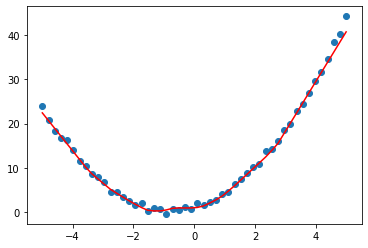

In [9]:
relu_layer2_1 = keras.layers.Dense(25, activation='relu') (Input2_1)
relu_layer2_2 = keras.layers.Dense(50, activation='relu') (relu_layer2_1)
relu_layer2_3 = keras.layers.Dense(25, activation='relu') (relu_layer2_2)
relu_layer2_out = keras.layers.Dense(1, activation='relu') (relu_layer2_3)

relu_Model2 = keras.Model(inputs=Input2_1, outputs=relu_layer2_out)

relu_Model2.compile(loss='mse')
relu_Model2.fit(x=x, y=y, epochs=500) # 训练轮数也比sigmoid模型更少

relu_pred2 = relu_Model2(np.reshape(x, [-1, 1]))

plt.scatter(x, y)
plt.plot(x, relu_pred2, color='r')

大家可以自行调整参数并训练。相信训练了几次大家就会发现，全使用relu模型，在相同参数量下(全连接层的参数量取决于输入的个数和输出的个数)，要比sigmoid更好训练，相同训练轮数，要达到相同的效果(可用loss值进行度量)，relu使用的参数量要比sigmoid少得多。这个现象将会留到后面的课程(快到了)

# 课后任务
讲第二节手写数字分类中，向代码'code_2.py'中的网络中添加一层新的全连接层，并讲网络的除输出层外(因为输出层要用softmax)的激活函数都换成relu，训练查看效果。